In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import numpy as np

Image Size : (1123, 3064, 4)


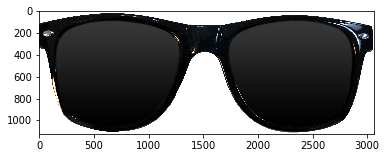

In [3]:
sunglasses = cv2.imread('images/sunglasses.png',cv2.IMREAD_UNCHANGED)
plt.imshow(sunglasses)
print("Image Size :",sunglasses.shape)

Alpha Channel: (Black Pixels = Transparent)


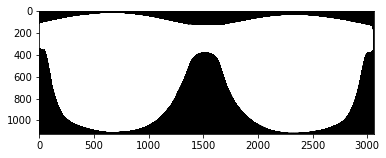

In [5]:
alpha_channel = sunglasses[:,:,3]
print("Alpha Channel: (Black Pixels = Transparent)")
plt.imshow(alpha_channel,cmap='gray')

In [6]:
values = np.where(alpha_channel != 0)
print(values)

(array([  17,   17,   17, ..., 1109, 1109, 1109], dtype=int64), array([ 687,  688,  689, ..., 2376, 2377, 2378], dtype=int64))


In [15]:
key_pts_frame = pd.read_csv('data/test_frames_keypoints.csv')
print('Number of Images:',key_pts_frame.shape[0])

Number of Images: 770


In [23]:
def show_keypoints(images,key_pts):
    plt.imshow(image)
    plt.scatter(key_pts[:,0],key_pts[:,1],s=20,marker='.',c='m')

Image Name Mary_Landrieu_20.jpg


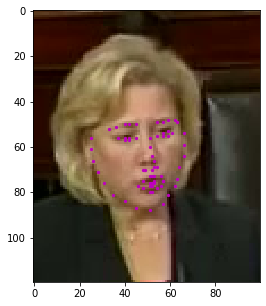

In [44]:
n=120
image_name = key_pts_frame.iloc[n,0]
image = mpimg.imread(os.path.join('data/test/',image_name))
key_pts = key_pts_frame.iloc[n,1:].to_numpy()
key_pts = key_pts.astype('float').reshape(-1,2)
print('Image Name',image_name)
plt.figure(figsize=(5,5))
show_keypoints(image,key_pts)
plt.show()

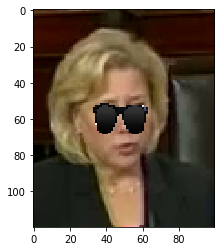

In [68]:
image_copy =  np.copy(image)
x = int(key_pts[17,0])
y = int(key_pts[17,1])
h = int(abs(key_pts[17,1] - key_pts[35,1]))
w = int(abs(key_pts[17,0] - key_pts[26,0]))
sunglasses = cv2.imread('images/sunglasses.png',cv2.IMREAD_UNCHANGED)
new_sunglasses = cv2.resize(sunglasses,(w,h),interpolation = cv2.INTER_CUBIC)
roi_color = image_copy[y:y+h,x:x+w]
ind = np.argwhere(new_sunglasses[:,:,3]>0)
for i in range(3):
    roi_color[ind[:,0],ind[:,1],i] = new_sunglasses[ind[:,0],ind[:,1],i]
image_copy[y:y+h,x:x+w] = roi_color

plt.imshow(image_copy)